## Einsatz des Naive Bayes Classifier zur Extraktion der Top 10 Keywords pro Sterne-Klasse

Also Basis des Notebooks wurde folgendes Videotutorial genommen: https://www.youtube.com/watch?v=5xDE06RRMFk

In [1]:
import json
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
with open('config.json') as json_data_file:
    config = json.load(json_data_file)

In [10]:
data = pd.read_csv("./Data_filtered/reviews_Patio_Lawn_and_Garden.csv", sep=";")
data.head(5)

,review,rating,products
0,"['good', 'usa', 'company', 'stands', 'behind',...",4.0,B00KS0F4FI
1,"['high', 'quality', 'eight', 'ply', 'hose', 'g...",5.0,B00KS0F4FI
2,"['probably', 'one', 'best', 'hoses', 'ever', '...",4.0,B00KS0F4FI
3,"['probably', 'bought', 'something', 'bit', 'fl...",5.0,B00KS0F4FI
4,"['bought', 'three', '58inch', 'flexogen', 'hos...",5.0,B00KS0F4FI


In [11]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
# 1, 2, 3 = 0; 4 = 1; 5 = 2 (im config.json definiert)
#data["rating"] = pd.cut(data["rating"], bins = config["label_three_num"]["bins"], labels = config["label_three_num"]["labels"])
#data['rating'] = data['rating'].astype(float)
#data.head(5)

In [12]:
# 1, 2, 3 = negativ 4, 5 = positiv
data["rating"] = pd.cut(data["rating"], bins = config["label_two"]["bins"], labels = config["label_two"]["labels"])
#data['rating'] = data['rating'].astype(float)
data.head(5)

,review,rating,products
0,"['good', 'usa', 'company', 'stands', 'behind',...",positiv,B00KS0F4FI
1,"['high', 'quality', 'eight', 'ply', 'hose', 'g...",positiv,B00KS0F4FI
2,"['probably', 'one', 'best', 'hoses', 'ever', '...",positiv,B00KS0F4FI
3,"['probably', 'bought', 'something', 'bit', 'fl...",positiv,B00KS0F4FI
4,"['bought', 'three', '58inch', 'flexogen', 'hos...",positiv,B00KS0F4FI


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data["review"])
#print(count_vect.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(X_train_counts, data['rating'], test_size=0.4, random_state=42)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['rating'], test_size=0.4, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
vec = count_vect.fit_transform(data["review"])
#X_train, X_test, y_train, y_test = train_test_split(X_train_counts, data['rating'], test_size=0.4, random_state=42)
#chi = SelectKBest(f_classif, k=2000)
chi = SelectPercentile(percentile=10)
#clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
clf = LinearSVC(C=1.0, penalty= "l1", max_iter=3000, dual=False)

pipeline = Pipeline([#('chi', chi),
                     ('clf', clf)])

# ('chi', SelectPercentile(percentile=10)), # wählt 10% mit dem Höchsten vorkommen
# ('clf', LinearSVC(C=1.0, penalty= "l1", max_iter=3000, dual=False))]) # Linear SVM Classifier aus dem Tutorium

In [19]:
#classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
#classifier.fit(X_train, y_train)
#predictions = classifier.predict(X_test)


model = pipeline.fit(X_train, y_train)

#vectorizer = model.named_steps['vect']
#chi = model.named_steps['chi']
#clf = model.named_steps['clf']

predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test))

#feature_names = vectorizer.get_feature_names()
#feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
#feature_names = np.asarray(feature_names)

#target_names = ['0', '1', '2']
#print("top 10 keywords per class:")
#for i, label in target_names:
#    top10 = np.argsort(clf.coef_[i])[-10:]
#    print("%s: %s" % (label, " ".join(feature_names[top10])))

#print("accuracy score: " + str(model.score(X_test, y_test)))
print(metrics.classification_report(y_test, predictions))



ValueError: could not convert string to float: "['put', 'around', 'perimeter', 'home', 'per', 'instructions', 'far', 'good', 'bugs', 'close', 'house', 'application', 'either', 'active', 'ant', 'hills', 'yard', 'grass', 'put', 'generously', 'waited', 'week', 'today', 'checked', 'ants', 'still', 'active', 'happy', 'would', 'rather', 'use', 'liquid', 'pour', 'ant', 'hills', 'kill', 'nasty', 'bugs', 'seams', 'work', 'better', 'dry', 'granules', 'bait', 'whatever', 'suppose', 'purchasing']"

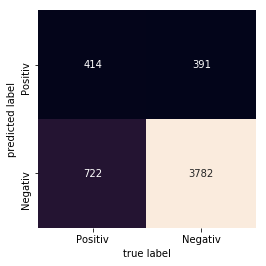

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = classifier.predict(X_test)
target_names = ['Positiv', 'Negativ']
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
print(classifier.predict(['great']))

<function accuracy_score at 0x0000020731BCD6A8>


In [ ]:
print(model.predict(['bad']))